Projeto para avaliar oportunidades de negócios no setor de padarias nas proximidades das estações de metrô localizadas na zona sul do Rio de Janeiro.


O projeto utilizou o acesso a dados de API (Foursquare), compreensão de dados geolocalizados, Web Scrapping, Clusterização de dados com K-Médias, e criação de uma apresentação.

## Importar bibliotecas

In [455]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import folium
import folium
from folium.plugins import MarkerCluster
from folium.plugins import MousePosition
from folium.features import DivIcon

from math import radians
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import json_normalize
from geopy.geocoders import Nominatim
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
#from bs4 import BeautifulSoup
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
import sys
sys.setrecursionlimit(2000)

# Show all Columns and Rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# bliblioteca = https://pypi.org/project/haversine/

print('Libraries imported')

Libraries imported


## Carregar os arquivos tratados

In [456]:
# Abrir DataFrame com informações das padarias:
df_padarias = pd.read_csv('3_padarias.csv')

#Excluir a primeira linha com valor desnecessário:
df_padarias.drop(df_padarias.columns[[0]],axis=1, inplace=True)

# Abrir DataFrame com informações dos negócios mais próximos:
df_places = pd.read_csv('3_not_df_cluster_dummie.csv')

# Renomear a coluna nome do DataFrame df_places:
df_places.rename(columns = {'Unnamed: 0':'name'}, inplace = True)


In [457]:
# Verificar importação das colunas:
df_padarias.head(1)

,name,endereço,estabelecimento,latitude,longitude,estacao_nome,estacao_lat,estacao_lon,distancia
0,La Veronese,"Rua Visconde de Piraja, 29, Rio de Janeiro, RJ...",padaria,-22.984827,-43.19636,General Osório,-22.984611,-43.197183,87


In [458]:
# Verificar o tamanho do arquivo:
df_padarias.shape

(199, 9)

In [459]:
# Verificar importação das colunas:
df_places.head(1)

,name,13002,13064,13236,13039,13325,13027,17067,17071,17065,13032,13065,13338,13003,13079,13309,11061,11045,13030,16041,13310,13034,13145,13006,13142,17069,10052,17035,13083,13383,17003,16045,13011,17134,13021,16003,13297,10032,13013,13016,13302,16001,11073,10000,16037,10028,16018,17043,13054,13007,11065,17048,13018,13068,13035,13009,17045,13263,17044,13072,17052,10039,17117,18000,13148,17047,13046,13332,13347,13322,13177,11064,17082,17030,13010,10043,17018,17000,17110,11062,17089,17062,13303,17084,11075,18025,13028,17131,13026,13040,13377,10003,13031,13053,13089,13025,13342,11067,10027,13276,10024,11071,16032,16004,10047,11148,12094,13099,10049,19014,13055,11068,17029,17115,13049,13080,17059,17113,16026,10015,13047,10030,18075,16049,13005,16000,13059,13057,13036,13311,13382,17068,16053,13001,11056,13000,13022,17054,13087,13334,18065,17028,10051,17119,13048,17114,11097,17100,13097,11137,17060,10020,10004,17107,13134,13086,13070,13343,13387,13090,15011,11139,13139,13324,17137,11000,10026,17002,17077,13286,13354,17080,17042,11003,15051,17138,17006,17096,18039,13029,17039,17102,13067,16027,17041,13345,16040,16046,17019,18048,17061,17064,13041,17005,10037,13058,17070,11041,17025,11001,11009,17010,11010,13165,10045,17033,11107,18064,16044,11152,12013,17112,17046,17058,12063,13044,11030,18035,15000,10038,16030,18018,13352,16043,10055,13015,16019,11038,17012,17090,13084,11069,13298,17076,18047,12082,19007,16033,19010,19013,16017,12005,18056,18066,16020,12000,11117,10036,10016,18055,13051,18061,11036,18021,10009,11138,12009,10006,13199
0,La Veronese,3.0,5.0,4.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,7.0,2.0,6.0,4.0,3.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [460]:
# Verificar o tamanho do arquivo:
df_places.shape

(191, 259)

## Tratamento das planilhas fundidas

In [461]:
# Incluir subcategorias em categorias

categorias = {}
for id in df_places.columns.values.tolist()[1:]:
    if (str(id)[:2]) not in categorias:
        categorias[str(id)[:2]] = []
        categorias[str(id)[:2]].append(id)
    else:
        categorias[str(id)[:2]].append(id)

In [462]:
# Somar colunas com as respectivas subcategorias

df_categorias = pd.DataFrame()
for keys, values in Categorias.items():
    df_categorias[keys] = df_places[values].sum(axis=1)

In [463]:
# Conferir soma das subcategorias
df_categorias.head(2)

,13,17,11,16,10,18,12,19,15
0,56.0,8.0,5.0,5.0,2.0,0.0,0.0,0.0,0.0
1,11.0,2.0,2.0,5.0,3.0,0.0,0.0,0.0,0.0


In [464]:
# Renomear as colunas das categorias

df_categorias.rename(columns={'13' : 'Refeições e Bebidas',
                              '17' : 'Varejo',
                              '11' : 'Serviços comerciais e profissionais',
                              '16' : 'Pontos de referência e ao ar livre',
                              '10' : 'Arts and Entertainment',
                              '18' : 'Esportes e Recreação',
                              '12' : 'Comunidade e Governo',
                             '19' : 'Viagens e Transporte',
                             '15' : 'Saúde e medicina'},inplace=True)

In [465]:
# Conferir colunas
df_categorias.columns.tolist()

['Refeições e Bebidas',
 'Varejo',
 'Serviços comerciais e profissionais',
 'Pontos de referência e ao ar livre',
 'Arts and Entertainment',
 'Esportes e Recreação',
 'Comunidade e Governo',
 'Viagens e Transporte',
 'Saúde e medicina']

In [466]:
# Inclusão da coluna nome
df_categorias['name'] = df_places['name']

In [467]:
# Fundir os Dataframes padarias com categorias
df = df_padarias.merge(df_categorias, how='inner', on='name')

In [469]:
# Conferir a fusão dos DataFrames
df.head(2)

,name,endereço,estabelecimento,latitude,longitude,estacao_nome,estacao_lat,estacao_lon,distancia,Refeições e Bebidas,Varejo,Serviços comerciais e profissionais,Pontos de referência e ao ar livre,Arts and Entertainment,Esportes e Recreação,Comunidade e Governo,Viagens e Transporte,Saúde e medicina
0,La Veronese,"Rua Visconde de Piraja, 29, Rio de Janeiro, RJ...",padaria,-22.984827,-43.19636,General Osório,-22.984611,-43.197183,87,56.0,8.0,5.0,5.0,2.0,0.0,0.0,0.0,0.0
1,Padaria Santa Marta,"Avenida Epitácio Pessoa, 1789, Rio de Janeiro, RJ",padaria,-22.978994,-43.20080,General Osório,-22.984611,-43.197183,726,11.0,2.0,2.0,5.0,3.0,0.0,0.0,0.0,0.0


## Análise dos dados

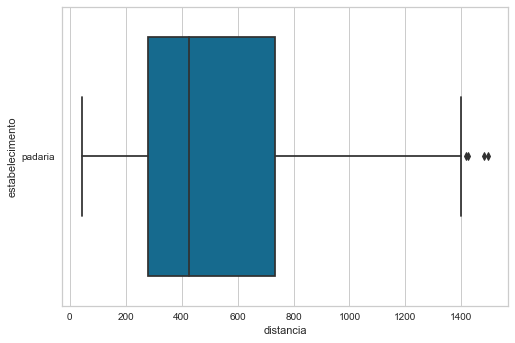

In [470]:
# Proximidade das padarias das estações do metrô.
sns.boxplot(x='distancia', y='estabelecimento', data=df)
plt.show()

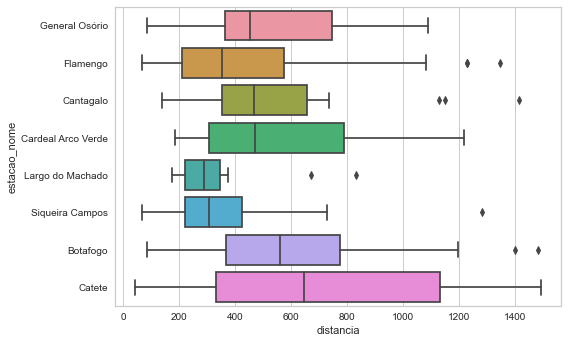

In [471]:
# Distância em metros das padasrias para as estações de metrô
sns.boxplot(x='distancia', y='estacao_nome', data=df)
plt.show()

## Tratamento dos dados para testagem dos modelos de Clusterização

In [472]:
# Seleção de colunas com floats para fazer testes nos modelos de clusterização.
df_dum = df_dum[['Refeições e Bebidas', 'Varejo', 'Serviços comerciais e profissionais',
                'Pontos de referência e ao ar livre', 'Arts and Entertainment',
                'Esportes e Recreação', 'Comunidade e Governo', 'Viagens e Transporte',
                'Saúde e medicina']]

<AxesSubplot:>

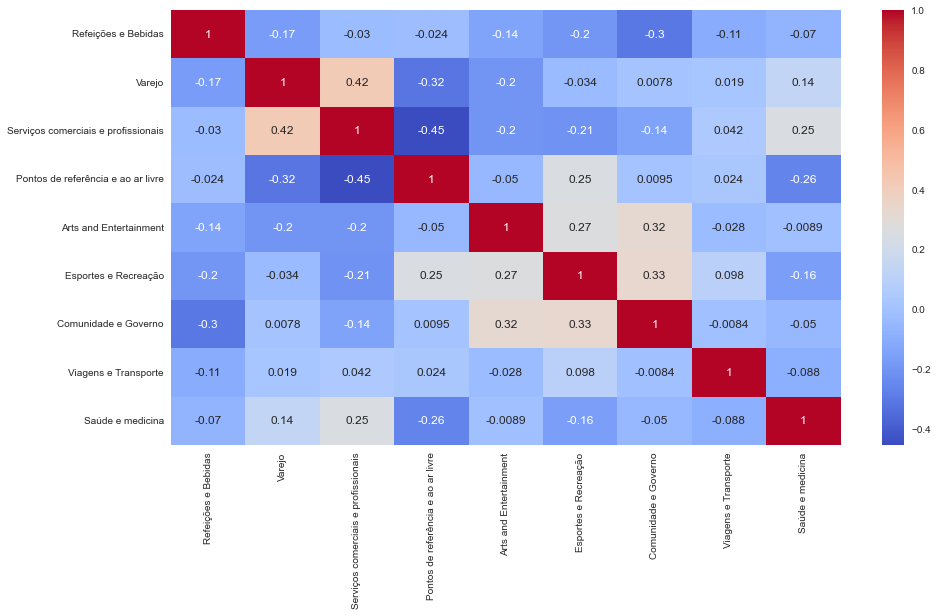

In [473]:
# Correlação das variáveis com Heatmap
plt.subplots(figsize=(15,8))
sns.heatmap(df_dum.corr(), annot=True, cmap='coolwarm')

## Testagem de modelos

### KMeans

In [474]:
errors = []
for i in range(2, 11):
  km = KMeans(n_clusters=i)
  km.fit(df_dum)
  errors.append(km.inertia_)

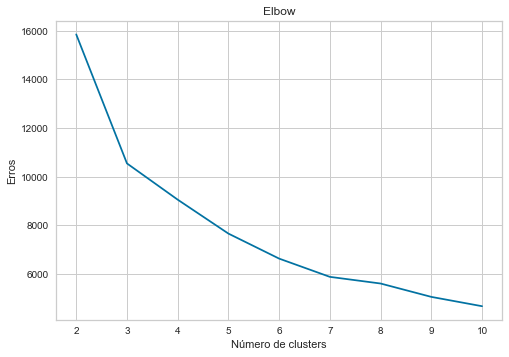

In [475]:
plt.plot(range(2,11), errors)
plt.title('Elbow')
plt.xlabel('Número de clusters')
plt.ylabel('Erros')
plt.show()

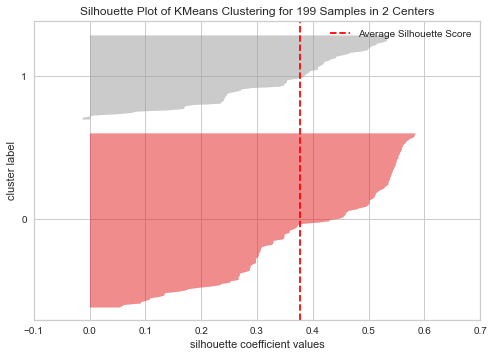

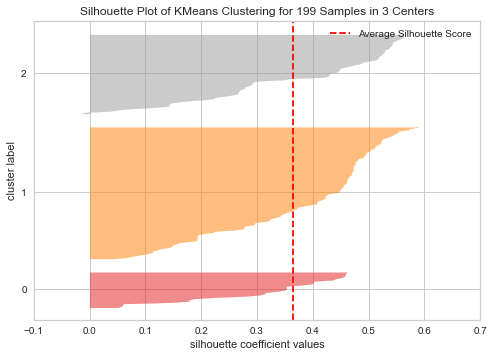

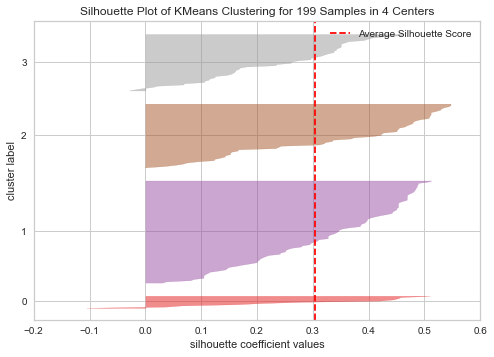

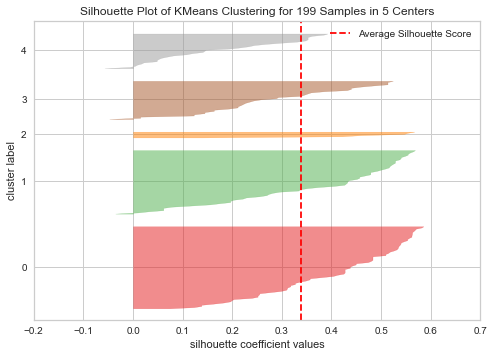

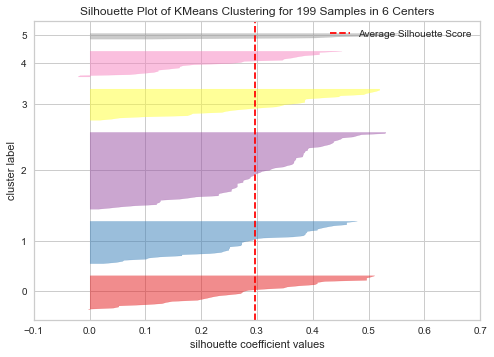

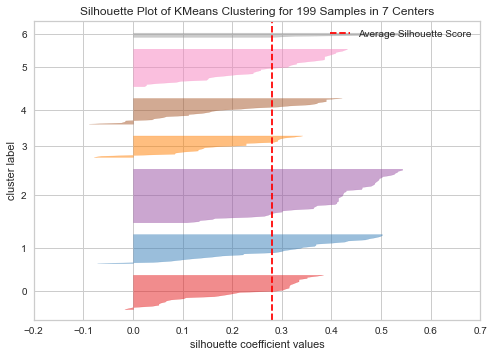

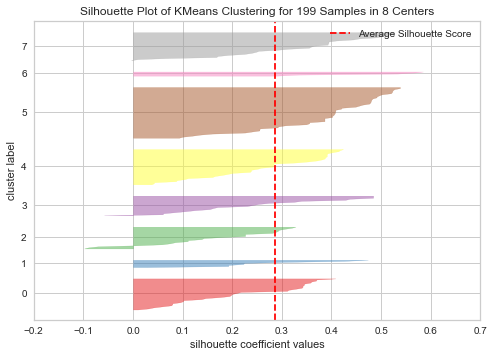

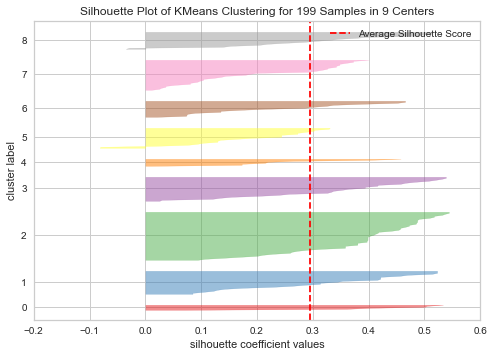

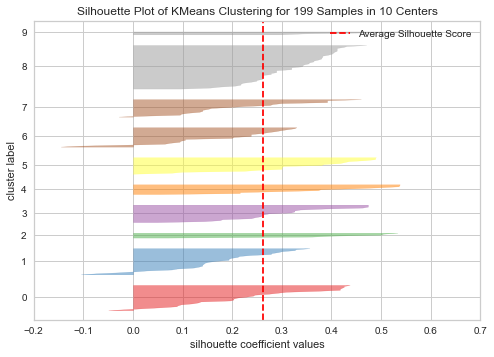

In [476]:
for i in range(2,11):
      kmeans = KMeans(n_clusters=i)
      yellow_visualizer = SilhouetteVisualizer(kmeans)
      yellow_visualizer.fit(df_dum)
      yellow_visualizer.show()

#### Padronizando dados com Standard Scaler

In [477]:
std = StandardScaler()
df_std = std.fit_transform(df_dum)
df_std = pd.DataFrame(df_std, columns=df_dum.columns)

In [478]:
df_std.head(2)

,Refeições e Bebidas,Varejo,Serviços comerciais e profissionais,Pontos de referência e ao ar livre,Arts and Entertainment,Esportes e Recreação,Comunidade e Governo,Viagens e Transporte,Saúde e medicina
0,0.903057,-0.146831,0.052228,1.167218,-0.722664,-0.951807,-0.422297,-0.178203,-0.494443
1,-3.540281,-1.658175,-1.246949,1.167218,-0.394330,-0.951807,-0.422297,-0.178203,-0.494443


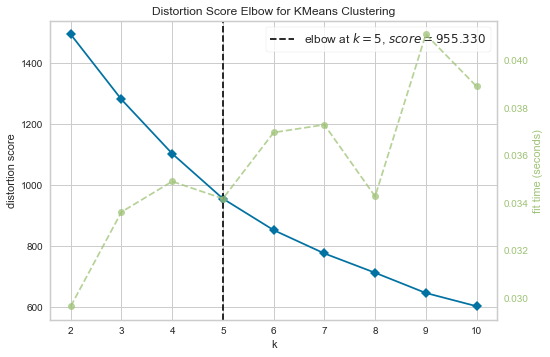

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [479]:
kmeans = KMeans()
yellow_visualizer = KElbowVisualizer(kmeans, k=(2,11))
yellow_visualizer.fit(df_std)
yellow_visualizer.show()

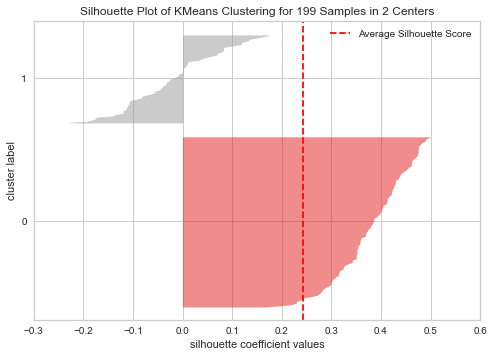

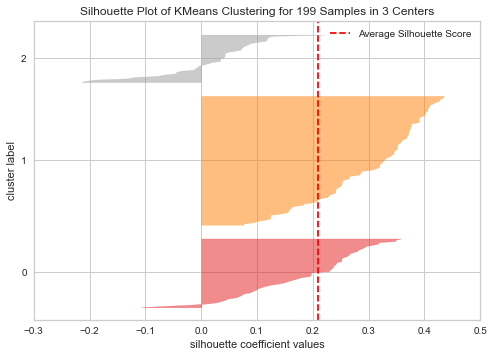

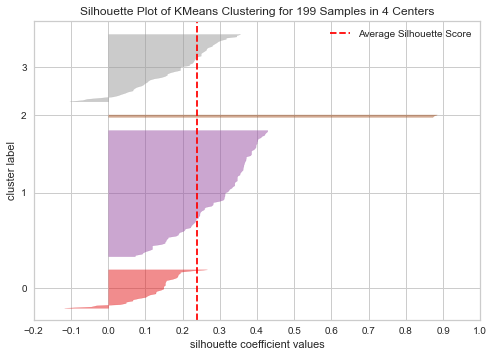

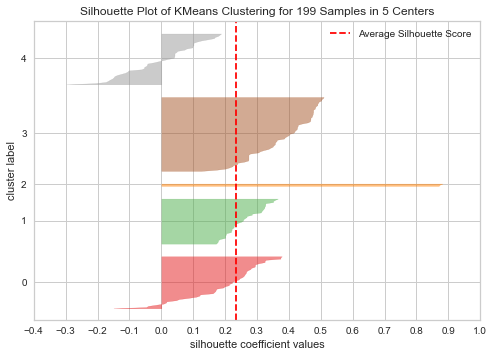

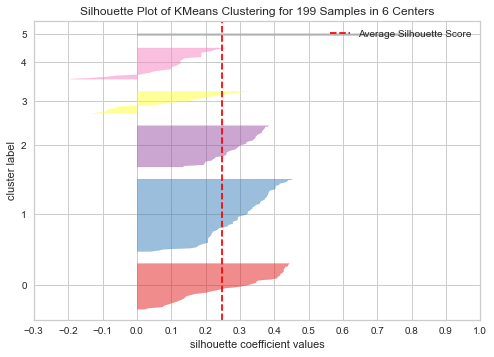

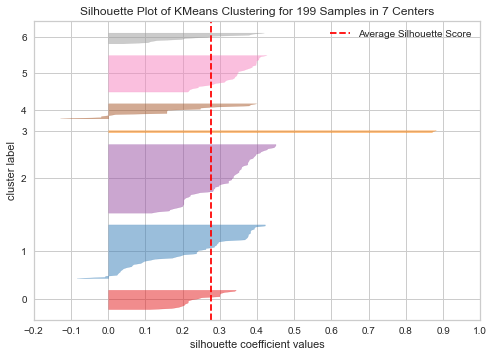

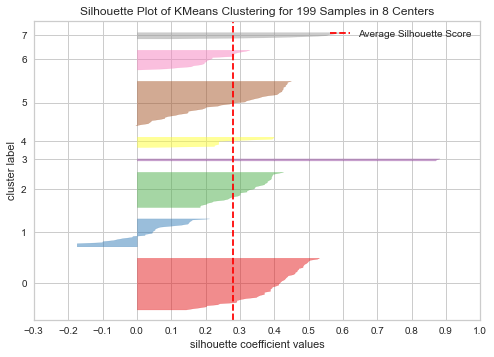

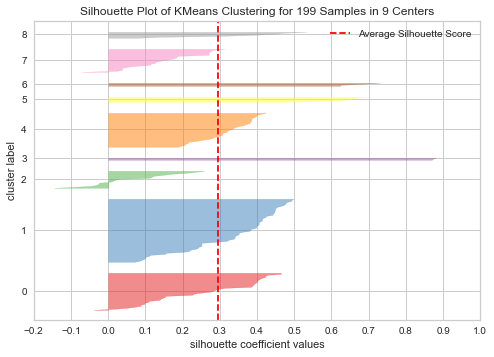

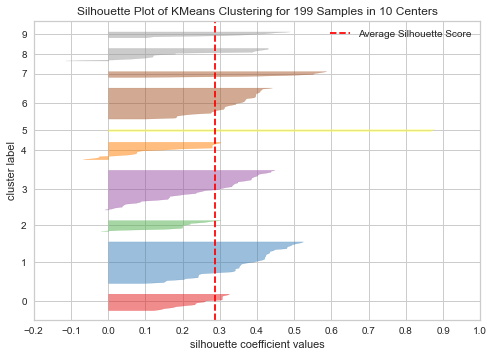

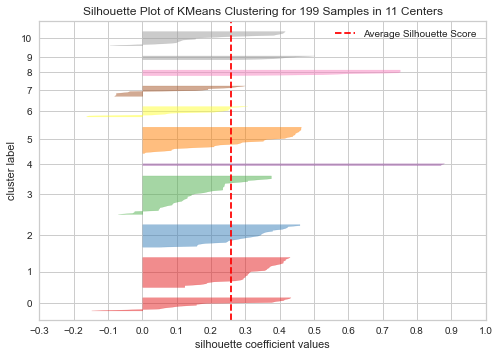

In [480]:
for i in range(2,12):
  kmeans = KMeans(n_clusters=i)
  yellow_visualizer = SilhouetteVisualizer(kmeans)
  yellow_visualizer.fit(df_std)
  yellow_visualizer.show()

#### Padronizando dados com Min Max Scaler

In [481]:
mmax = MinMaxScaler()
df_mmax = mmax.fit_transform(df_dum)
df_mmax = pd.DataFrame(df_mmax, columns=df_dum.columns)

In [482]:
df_mmax.head(1)

,Refeições e Bebidas,Varejo,Serviços comerciais e profissionais,Pontos de referência e ao ar livre,Arts and Entertainment,Esportes e Recreação,Comunidade e Governo,Viagens e Transporte,Saúde e medicina
0,0.75,0.380952,0.454545,0.357143,0.117647,0.0,0.0,0.0,0.0


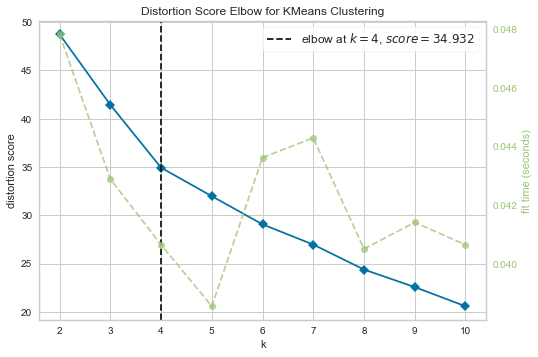

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [483]:
kmeans = KMeans()
yellow_visualizer = KElbowVisualizer(kmeans, k=(2,11))
yellow_visualizer.fit(df_mmax)
yellow_visualizer.show()

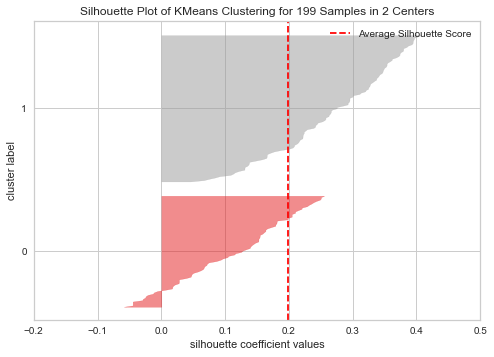

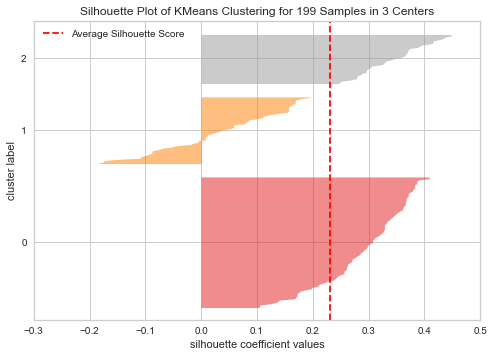

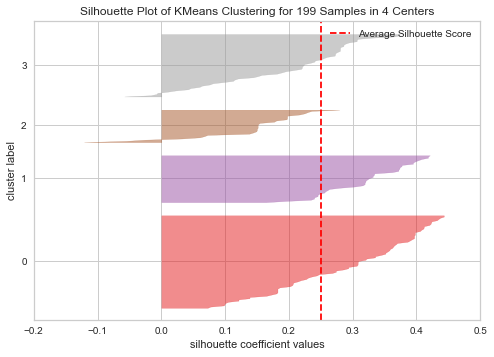

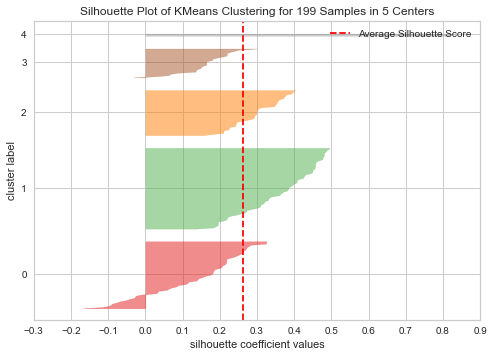

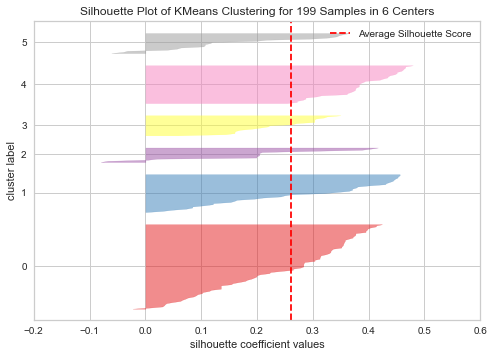

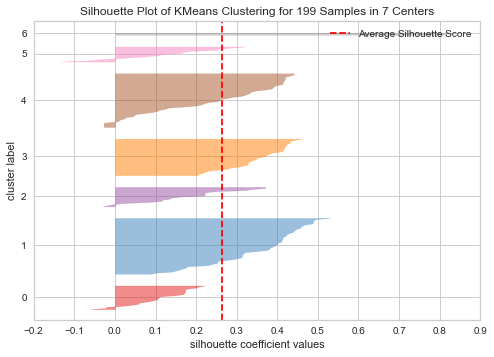

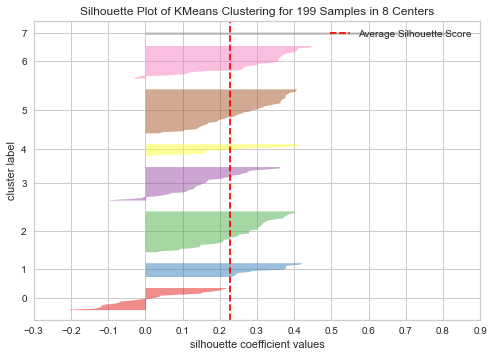

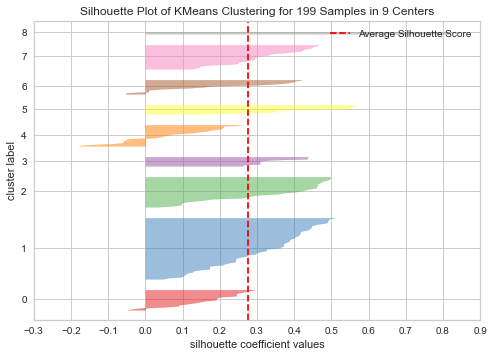

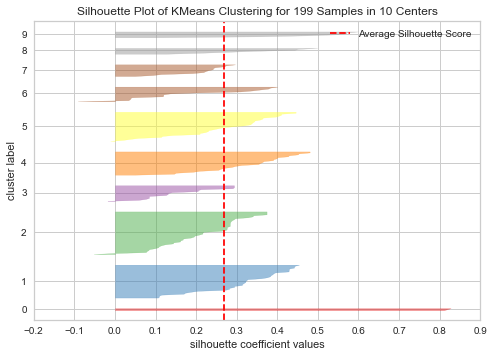

In [484]:
for i in range(2,11):
  kmeans = KMeans(n_clusters=i)
  yellow_visualizer = SilhouetteVisualizer(kmeans)
  yellow_visualizer.fit(df_mmax)
  yellow_visualizer.show()

### Aplicação do modelo

In [485]:
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(df_dum)




#clusters = kmeans.fit_predict(df_std)
#clusters = kmeans.fit_predict(df_mmax)

In [486]:
df_dum_est =pd.get_dummies(df['estacao_nome'], prefix='est_', dtype=float)
df_dum_est.head(2)

df_dum = pd.concat([df, df_dum_est], axis=1)
df_dum.head(1)

df_dum = df_dum[['Refeições e Bebidas', 'Varejo', 'Serviços comerciais e profissionais',
                'Pontos de referência e ao ar livre', 'Arts and Entertainment',
                'Esportes e Recreação', 'Comunidade e Governo', 'Viagens e Transporte',
                'Saúde e medicina', 'est__Botafogo', 'est__Cantagalo',
                'est__Cardeal Arco Verde', 'est__Catete', 'est__Flamengo',
                'est__General Osório', 'est__Largo do Machado', 'est__Siqueira Campos']]

In [487]:
df_dum['cluster'] = clusters
df['cluster'] = clusters

In [488]:
# Concatenar a coluna distância para realizar avaliações com o Dataframe df_dum
distancia = df['distancia'].astype(float)
df_dum = pd.concat([df_dum, distancia], axis=1)

In [489]:
# Distribuição das padasrias por Cluster
df.groupby(['cluster','estabelecimento'])['estabelecimento'].count()

cluster  estabelecimento
0        padaria            60
1        padaria            11
2        padaria            45
3        padaria            83
Name: estabelecimento, dtype: int64

In [490]:
# Distribuição de padarias em relação aos clusters e as estações de metrô mais próximas
df.groupby(['cluster','estacao_nome'])['estacao_nome'].count()

cluster  estacao_nome      
0        Botafogo               9
         Cantagalo             17
         Cardeal Arco Verde    14
         Catete                 8
         Flamengo               1
         General Osório         7
         Siqueira Campos        4
1        Botafogo               2
         Cantagalo              1
         Cardeal Arco Verde     1
         Catete                 2
         Flamengo               1
         General Osório         2
         Siqueira Campos        2
2        Botafogo              13
         Cantagalo              1
         Catete                 4
         Flamengo               7
         General Osório         6
         Largo do Machado      10
         Siqueira Campos        4
3        Botafogo              20
         Cantagalo              3
         Cardeal Arco Verde     1
         Catete                 8
         Flamengo              17
         General Osório        18
         Largo do Machado       5
         Siqueira Ca

In [491]:
# Média das categorias de negócios por clusters
df.groupby('cluster')[['Refeições e Bebidas', 'Varejo', 'Serviços comerciais e profissionais',
       'Pontos de referência e ao ar livre', 'Arts and Entertainment',
       'Esportes e Recreação', 'Comunidade e Governo', 'Viagens e Transporte',
       'Saúde e medicina']].mean().T

cluster,0,1,2,3
Refeições e Bebidas,58.016667,23.636364,37.133333,47.132530
Varejo,6.083333,3.818182,10.444444,10.012048
Serviços comerciais e profissionais,4.100000,2.272727,5.355556,5.530120
Pontos de referência e ao ar livre,2.500000,3.818182,1.866667,1.710843
Arts and Entertainment,3.450000,3.363636,5.422222,4.192771
Esportes e Recreação,0.850000,1.363636,1.400000,0.939759
Comunidade e Governo,0.100000,0.272727,0.400000,0.060241
Viagens e Transporte,0.016667,0.000000,0.222222,0.036145
Saúde e medicina,0.133333,0.000000,0.333333,0.216867


In [492]:
# Soma das categorias de negócios por clusters
df.groupby('cluster')[['Refeições e Bebidas', 'Varejo', 'Serviços comerciais e profissionais',
       'Pontos de referência e ao ar livre', 'Arts and Entertainment',
       'Esportes e Recreação', 'Comunidade e Governo', 'Viagens e Transporte',
       'Saúde e medicina']].sum().T

cluster,0,1,2,3
Refeições e Bebidas,3481.0,260.0,1671.0,3912.0
Varejo,365.0,42.0,470.0,831.0
Serviços comerciais e profissionais,246.0,25.0,241.0,459.0
Pontos de referência e ao ar livre,150.0,42.0,84.0,142.0
Arts and Entertainment,207.0,37.0,244.0,348.0
Esportes e Recreação,51.0,15.0,63.0,78.0
Comunidade e Governo,6.0,3.0,18.0,5.0
Viagens e Transporte,1.0,0.0,10.0,3.0
Saúde e medicina,8.0,0.0,15.0,18.0


In [493]:
cluster_name = {0 : '- serviços / ++ concorrência',
                1 : '++ serviços / + concorrência',
                2 : '+ serviços / - concorrência',
                3 : '+ serviços / + concorrência'} 

In [494]:
df_dum['cluster_name'] = df_dum['cluster'].map(cluster_name)
df['cluster_name'] = df['cluster'].map(cluster_name)

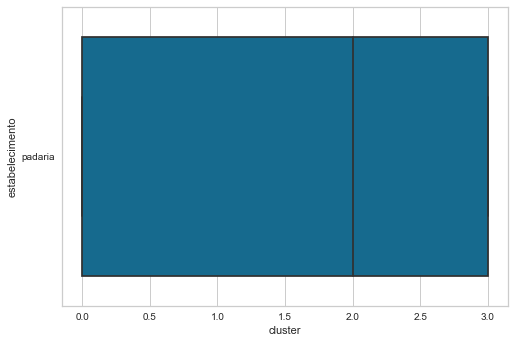

In [495]:
sns.boxplot(x='cluster', y='estabelecimento', data=df)
plt.show()

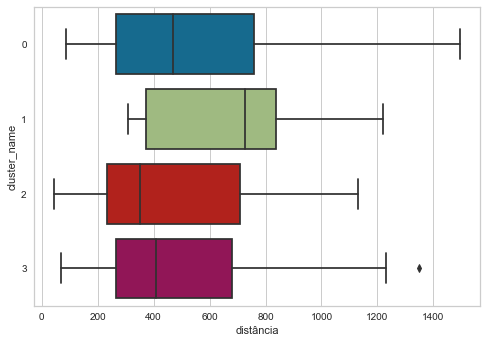

In [497]:
sns.boxplot(x='distancia', y='cluster', data=df, orient="h")
plt.xlabel('distância')
plt.ylabel('cluster_name')
plt.show()

In [499]:
df.sort_values("distancia", ascending = True)[['distancia']]
df.head(1)

,name,endereço,estabelecimento,latitude,longitude,estacao_nome,estacao_lat,estacao_lon,distancia,Refeições e Bebidas,Varejo,Serviços comerciais e profissionais,Pontos de referência e ao ar livre,Arts and Entertainment,Esportes e Recreação,Comunidade e Governo,Viagens e Transporte,Saúde e medicina,cluster,cluster_name
0,La Veronese,"Rua Visconde de Piraja, 29, Rio de Janeiro, RJ...",padaria,-22.984827,-43.19636,General Osório,-22.984611,-43.197183,87,56.0,8.0,5.0,5.0,2.0,0.0,0.0,0.0,0.0,0,- serviços / ++ concorrência


In [510]:
df[(df['cluster']==2)  & (df['estabelecimento']=='padaria')].sort_values("distancia", ascending = True).head(1)

,name,endereço,estabelecimento,latitude,longitude,estacao_nome,estacao_lat,estacao_lon,distancia,Refeições e Bebidas,Varejo,Serviços comerciais e profissionais,Pontos de referência e ao ar livre,Arts and Entertainment,Esportes e Recreação,Comunidade e Governo,Viagens e Transporte,Saúde e medicina,cluster,cluster_name,cluster_label
193,Confeitaria e Bar Rio Claro do Catete Ltda,"Rua do Catete, 148, Rio de Janeiro, RJ, 22220-000",padaria,-22.92597,-43.1767,Catete,-22.92558,-43.1766,44,38.0,7.0,6.0,2.0,5.0,2.0,0.0,0.0,0.0,2,+ serviços / - concorrência,green


## Mapas

In [501]:
station_dict = {'Catete' : '-22.925580460005982,-43.1766003091964',
                'Largo do Machado' : '-22.930651090814383,-43.17832974593375',
                'Flamengo' : '-22.93684861832403,-43.17829091934274',
                'Botafogo' : '-22.950622880463147,-43.18405212488933',
                'Cardeal Arco Verde' : '-22.96361994621739,-43.18083122492285',
                'Siqueira Campos' : '-22.966722295911186,-43.18649393180904',
                'Cantagalo' : '-22.976112641984226,-43.192580445299605',
                'General Osório' : '-22.984610664497772,-43.19718307781211'}
station_dict

{'Catete': '-22.925580460005982,-43.1766003091964',
 'Largo do Machado': '-22.930651090814383,-43.17832974593375',
 'Flamengo': '-22.93684861832403,-43.17829091934274',
 'Botafogo': '-22.950622880463147,-43.18405212488933',
 'Cardeal Arco Verde': '-22.96361994621739,-43.18083122492285',
 'Siqueira Campos': '-22.966722295911186,-43.18649393180904',
 'Cantagalo': '-22.976112641984226,-43.192580445299605',
 'General Osório': '-22.984610664497772,-43.19718307781211'}

In [502]:
station = [['Catete',-22.925580460005982,-43.1766003091964, 'Rio de Janeiro'],
           ['Largo do Machado',-22.930651090814383,-43.17832974593375, 'Rio de Janeiro'],
           ['Flamengo',-22.93684861832403,-43.17829091934274, 'Rio de Janeiro'],
           ['Botafogo',-22.950622880463147,-43.18405212488933, 'Rio de Janeiro'],
           ['Cardeal Arco Verde',-22.96361994621739,-43.18083122492285, 'Rio de Janeiro'],
           ['Siqueira Campos',-22.966722295911186,-43.18649393180904, 'Rio de Janeiro'],
           ['Cantagalo',-22.976112641984226,-43.192580445299605, 'Rio de Janeiro'],
           ['General Osório',-22.984610664497772,-43.19718307781211, 'Rio de Janeiro']]

titles =   ['estacao_nome','latitude','longitude','cidade']

df_station = pd.DataFrame(station, columns=titles)
df_station

,estacao_nome,latitude,longitude,cidade
0,Catete,-22.925580,-43.176600,Rio de Janeiro
1,Largo do Machado,-22.930651,-43.178330,Rio de Janeiro
2,Flamengo,-22.936849,-43.178291,Rio de Janeiro
3,Botafogo,-22.950623,-43.184052,Rio de Janeiro
4,Cardeal Arco Verde,-22.963620,-43.180831,Rio de Janeiro
5,Siqueira Campos,-22.966722,-43.186494,Rio de Janeiro
6,Cantagalo,-22.976113,-43.192580,Rio de Janeiro
7,General Osório,-22.984611,-43.197183,Rio de Janeiro


In [511]:
cluster_name

{0: '- serviços / ++ concorrência',
 1: '++ serviços / + concorrência',
 2: '+ serviços / - concorrência',
 3: '+ serviços / + concorrência'}

In [504]:
cluster_label = {0 : 'red',
                 1 : 'purple',
                 2 : 'green',
                 3 : 'blue'}

In [505]:
df['cluster_label'] = df['cluster'].map(cluster_label)

In [512]:
# Mapa das estações de metrô e as padarias mais próximas em seus respectivos clusters.

station_arco_verde = [-22.96361994621739,-43.18083122492285]
site_map = folium.Map(location=station_arco_verde, zoom_start=13)

for index, row in df.iterrows():
    coordinate = [row['latitude'], row['longitude']]
    name = [row['name'],row['estabelecimento']]
    cor = row['cluster_label']
    cluster_label = row['cluster_label']
    folium.Marker(
        coordinate,
        name,
        icon=folium.Icon(color=cor),
        ).add_to(site_map)

for index, row in df_station.iterrows():
    coordinate = [row['latitude'], row['longitude']]
    folium.Circle(coordinate, radius=1500, color='##ADD8E6', fill=True).add_child(folium.Popup(row['estacao_nome'])).add_to(site_map)
    folium.map.Marker(coordinate, icon=DivIcon(icon_size=(13,13),icon_anchor=(0,0), html='<div style="font-size: 20; color:#1f1434;"><b>%s</b></div>' % row['estacao_nome'], )).add_to(site_map)


site_map

In [508]:
site_map.save("index.html")

In [509]:
df.to_csv("4.1_not_df_cluster.csv")
df_dum.to_csv("4.1_not_df_cluster_dummie.csv")